In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score,classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xb

In [40]:
data=pd.read_csv('/home/mrkernal/Project/processed_data/feature_engineered_data/feature_engineered_data.csv')

In [41]:
data.head()

,Date,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Month,year,Day,Revenue,ROI,Product_Category_Electronics,Product_Category_Fashion,Product_Category_Home Decor,Product_Category_Sports,Product_Category_Toys
0,2023-01-01,1.476139,0.755245,0,0.657777,32,1,2023,1,29850.0,3.402408,0,0,0,1,0
1,2023-01-02,0.221781,-1.477181,2,0.667351,16,1,2023,2,9112.0,0.338512,0,0,0,0,1
2,2023-01-03,0.671295,-1.479952,2,-0.394100,27,1,2023,3,18891.0,3.979296,0,0,1,0,0
3,2023-01-04,1.443236,-1.684349,2,1.588457,29,1,2023,4,26775.0,1.841527,0,0,0,0,1
4,2023-01-05,0.707511,1.587382,2,-1.111588,17,1,2023,5,12073.0,5.872037,0,0,0,0,1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         1000 non-null   float64
 1   Discount                      1000 non-null   float64
 2   Customer_Segment              1000 non-null   int64  
 3   Marketing_Spend               1000 non-null   float64
 4   Units_Sold                    1000 non-null   int64  
 5   Month                         1000 non-null   int64  
 6   year                          1000 non-null   int64  
 7   Day                           1000 non-null   int64  
 8   Product_Category_Electronics  1000 non-null   int64  
 9   Product_Category_Fashion      1000 non-null   int64  
 10  Product_Category_Home Decor   1000 non-null   int64  
 11  Product_Category_Sports       1000 non-null   int64  
 12  Product_Category_Toys         1000 non-null   int64  
dtypes: f

In [42]:
data.drop(columns=['Date','Revenue','ROI'],inplace=True)

In [141]:
x=data[['Price','Discount','Customer_Segment','Marketing_Spend']]

In [142]:
y=data['Units_Sold']

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [144]:
print(x_train.shape,x_test.shape)

(800, 4) (200, 4)


In [145]:
Linear_model=LinearRegression()

In [146]:
Linear_model

LinearRegression()

In [147]:
Linear_model.fit(x_train,y_train)

LinearRegression()

In [148]:
ypred=Linear_model.predict(x_test)

In [149]:
print(mse(y_test,ypred))

53.03858755839772


In [150]:
print(mae(y_test,ypred))

5.884019354756044


In [151]:
print(r2_score(y_test,ypred))

-0.009136266674741211


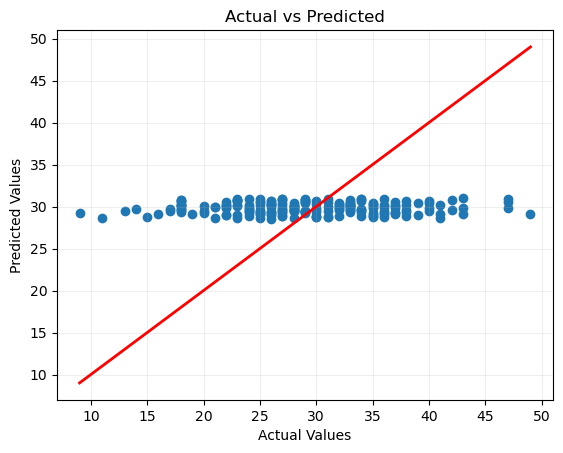

In [152]:
plt.scatter(y_test, ypred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='r',lw=2)
plt.grid(True,alpha=0.2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [153]:
Ran_model=RandomForestRegressor()

In [154]:
Ran_model.fit(x_train,y_train)

RandomForestRegressor()

In [155]:
ypred_rfr=Ran_model.predict(x_test)

In [156]:
mse_rfr=mse(y_test,ypred_rfr)
mae_rfr=mae(y_test,ypred_rfr)
r2score_rfr=r2_score(y_test,ypred_rfr)
print(mse_rfr,mae_rfr,r2score_rfr)

58.58110549999999 6.159050000000001 -0.11459073145301213


In [157]:
# xgboost

In [158]:
xb_model=xb.XGBRegressor(objective='reg:squarederror',n_estimators=100)

In [159]:
xb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [160]:
ypred_xb=xb_model.predict(x_test)

In [161]:
print(f'MSE: {mse(y_test, ypred_xb)}')
print(f'MAE: {mae(y_test, ypred_xb)}')
print(f'R²: {r2_score(y_test, ypred_xb)}')

MSE: 65.7905642952758
MAE: 6.513119835853576
R²: -0.25176117034148304


In [162]:
data

,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Month,year,Day,Product_Category_Electronics,Product_Category_Fashion,Product_Category_Home Decor,Product_Category_Sports,Product_Category_Toys
0,1.476139,0.755245,0,0.657777,32,1,2023,1,0,0,0,1,0
1,0.221781,-1.477181,2,0.667351,16,1,2023,2,0,0,0,0,1
2,0.671295,-1.479952,2,-0.394100,27,1,2023,3,0,0,1,0,0
3,1.443236,-1.684349,2,1.588457,29,1,2023,4,0,0,0,0,1
4,0.707511,1.587382,2,-1.111588,17,1,2023,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.810706,1.672605,1,-1.064391,34,9,2025,22,0,1,0,0,0
996,0.040940,0.246679,2,1.091452,21,9,2025,23,1,0,0,0,0
997,0.615192,-0.827269,0,-0.529843,19,9,2025,24,1,0,0,0,0
998,-1.567366,-0.212694,0,0.853341,26,9,2025,25,0,0,0,1,0


In [125]:
y_test

521    47
737    26
740    25
660    33
411    31
       ..
408    34
332    24
208    18
613    32
78     40
Name: Units_Sold, Length: 200, dtype: int64

In [126]:
y_train

29     25
535    29
695    31
557    35
836    23
       ..
106    31
270    25
860    20
435    37
102    28
Name: Units_Sold, Length: 800, dtype: int64

In [127]:
x_train

,Price,Discount,Customer_Segment,Marketing_Spend,Month,year,Day,Product_Category_Electronics,Product_Category_Fashion,Product_Category_Home Decor,Product_Category_Sports,Product_Category_Toys
29,1.434225,0.110876,2,-1.159239,1,2023,30,0,0,0,1,0
535,0.748389,-1.520139,1,-1.362632,6,2024,19,0,0,0,0,1
695,-0.434053,-1.022658,0,-1.334480,11,2024,26,0,1,0,0,0
557,0.769104,1.299841,1,0.674902,7,2024,11,0,0,0,0,1
836,0.562818,-1.711371,1,0.316743,4,2025,16,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.089680,0.909755,0,0.005892,4,2023,17,0,0,1,0,0
270,-0.893683,-1.028894,1,1.214938,9,2023,28,0,0,1,0,0
860,0.183044,1.121773,2,1.585626,5,2025,10,1,0,0,0,0
435,-0.923823,-1.559632,0,1.500337,3,2024,11,0,0,0,1,0


In [128]:
y_train

29     25
535    29
695    31
557    35
836    23
       ..
106    31
270    25
860    20
435    37
102    28
Name: Units_Sold, Length: 800, dtype: int64

In [129]:
x_test

,Price,Discount,Customer_Segment,Marketing_Spend,Month,year,Day,Product_Category_Electronics,Product_Category_Fashion,Product_Category_Home Decor,Product_Category_Sports,Product_Category_Toys
521,0.790716,-0.359582,2,-0.735409,6,2024,5,1,0,0,0,0
737,-0.777990,-1.676727,1,0.722761,1,2025,7,0,0,0,1,0
740,-1.090647,0.838390,1,1.348445,1,2025,10,0,1,0,0,0
660,0.646955,-0.188443,2,0.049285,10,2024,22,0,0,0,0,1
411,-0.185750,1.247183,0,-0.392930,2,2024,16,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
408,-0.039641,0.837004,1,1.211705,2,2024,13,0,0,0,0,1
332,-0.435987,1.328941,2,1.186972,11,2023,29,1,0,0,0,0
208,1.046994,-0.784311,2,1.480064,7,2023,28,0,0,0,1,0
613,1.257907,-0.153800,1,1.323001,9,2024,5,0,0,1,0,0


In [135]:
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_model = xb.XGBRegressor(objective='reg:squarederror', random_state=42)


In [136]:
search=RandomizedSearchCV(xb,param_distributions=param_dist,n_iter=10,cv=3,verbose=1,n_jobs=-1)

In [137]:
search.fit(x_train,y_train)

InvalidParameterError: The 'estimator' parameter of RandomizedSearchCV must be an object implementing 'fit'. Got <module 'xgboost' from '/home/mrkernal/anaconda3/lib/python3.8/site-packages/xgboost/__init__.py'> instead.

In [164]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define XGBoost Regressor model
xgb_model = xb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter space for tuning
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# RandomizedSearchCV to find best parameters
search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                            n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)

search.fit(x_train, y_train)

# Best model and hyperparameters
print("Best parameters found: ", search.best_params_)

# Predictions and Evaluation on the test set
ypred_xgb = search.best_estimator_.predict(x_test)
print(f'MSE: {mean_squared_error(y_test, ypred_xgb)}')
print(f'MAE: {mean_absolute_error(y_test, ypred_xgb)}')
print(f'R²: {r2_score(y_test, ypred_xgb)}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/mrkernal/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
MSE: 53.38098008533925
MAE: 5.853210487365723
R²: -0.015650782469391222


In [165]:
import xgboost as xgb
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)


NotFittedError: need to call fit or load_model beforehand

In [166]:
df=data

In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features
features = ['Price', 'Discount', 'Customer_Segment', 'Marketing_Spend', 'Month', 'Day',
           'Product_Category_Electronics', 'Product_Category_Fashion', 
           'Product_Category_Home Decor', 'Product_Category_Sports',
           'Product_Category_Toys']

X = df[features]
y = df['Units_Sold']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R2': r2
    }

rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test, 'Random Forest')
xgb_metrics = evaluate_model(xgb_model, X_test_scaled, y_test, 'XGBoost')

# Feature importance
rf_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

Random Forest Metrics:
RMSE: 7.60
R2 Score: -0.10

XGBoost Metrics:
RMSE: 8.21
R2 Score: -0.28



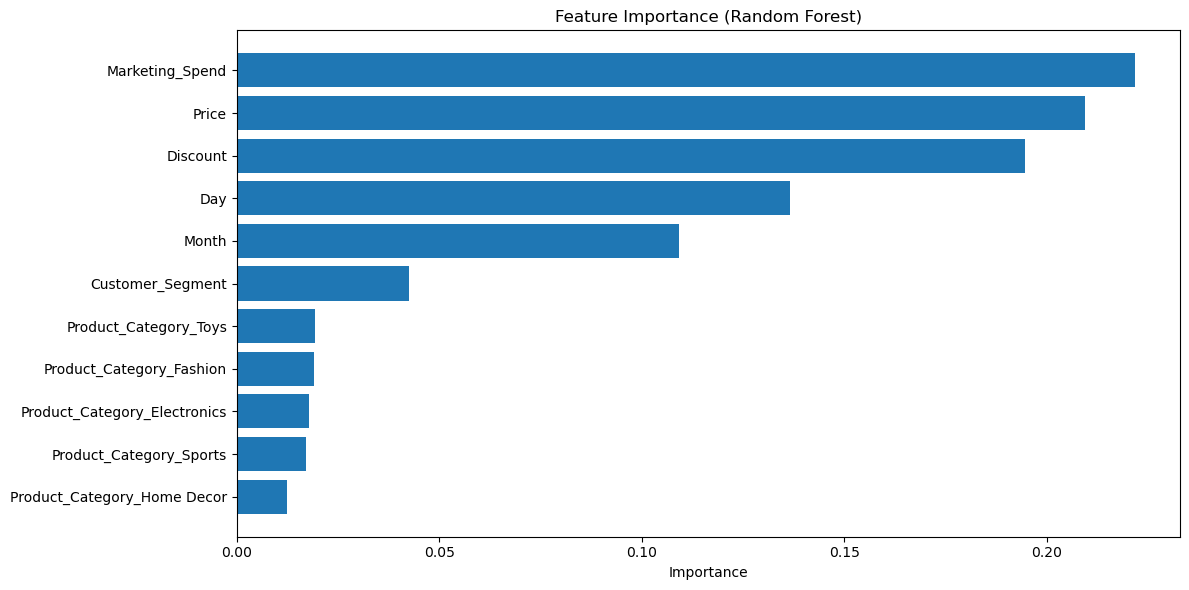

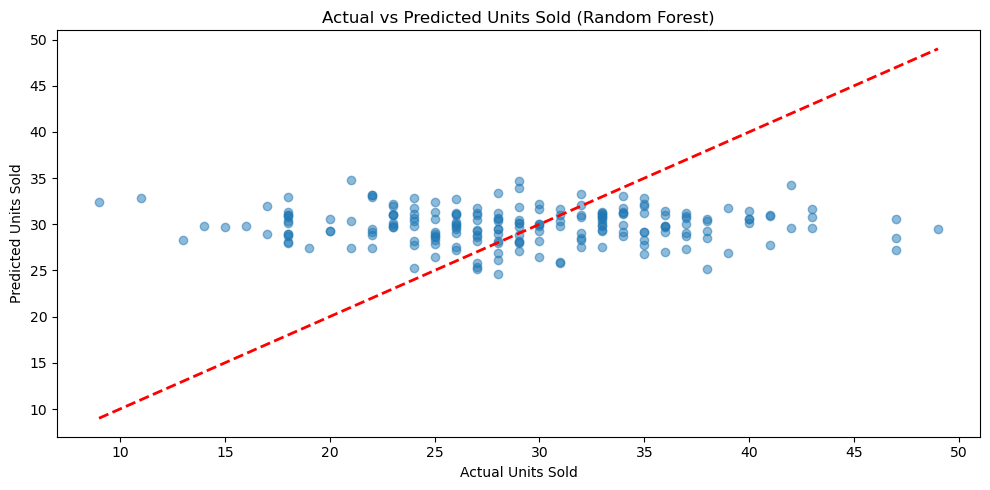

Predicted Units Sold for Next Month (Average):
Random Forest: 29.63
XGBoost: 29.87


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('/home/mrkernal/Project/processed_data/feature_engineered_data/feature_engineered_data.csv')

# Prepare features
features = ['Price', 'Discount', 'Customer_Segment', 'Marketing_Spend', 'Month', 'Day',
           'Product_Category_Electronics', 'Product_Category_Fashion', 
           'Product_Category_Home Decor', 'Product_Category_Sports',
           'Product_Category_Toys']

X = df[features]
y = df['Units_Sold']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Get predictions
rf_predictions = rf_model.predict(X_test_scaled)
xgb_predictions = xgb_model.predict(X_test_scaled)

# Print metrics
print("Random Forest Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions)):.2f}")
print(f"R2 Score: {r2_score(y_test, rf_predictions):.2f}\n")

print("XGBoost Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_predictions)):.2f}")
print(f"R2 Score: {r2_score(y_test, xgb_predictions):.2f}\n")

# Plot feature importance
plt.figure(figsize=(12, 6))
importance_df = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(importance_df['feature'], importance_df['importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('Actual vs Predicted Units Sold (Random Forest)')
plt.tight_layout()
plt.show()

# Example predictions for next month
last_month_data = X.iloc[-30:].copy()  # Get last 30 days as template
last_month_data['Month'] = (last_month_data['Month'] % 12) + 1  # Increment month

# Scale and predict
last_month_scaled = scaler.transform(last_month_data)
future_predictions_rf = rf_model.predict(last_month_scaled)
future_predictions_xgb = xgb_model.predict(last_month_scaled)

print("Predicted Units Sold for Next Month (Average):")
print(f"Random Forest: {future_predictions_rf.mean():.2f}")
print(f"XGBoost: {future_predictions_xgb.mean():.2f}")

In [170]:
df=pd.read_csv('/home/mrkernal/Project/data/Ecommerce_Sales_Prediction_Dataset.csv')

In [181]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [182]:
oe=OneHotEncoder

In [183]:
oe.fit_transform(df['Product_Category'])

TypeError: wrapped() missing 1 required positional argument: 'X'

In [173]:
df.drop(columns=['Date'],inplace=True)

In [174]:
linear_model=LinearRegression()

In [177]:
x=df.drop(columns=['Units_Sold'])

In [178]:
y=df['Units_Sold']

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [180]:
linear_model.fit(x_train,y_train)

ValueError: could not convert string to float: 'Sports'